## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bbc_data.csv')

## Adding Length Column

In [3]:
df.columns

Index(['data', 'labels'], dtype='object')

In [4]:
df['length'] = df['data'].apply(len)

In [5]:
df

,data,labels,length
0,Musicians to tackle US red tape Musicians gro...,entertainment,2254
1,"U2s desire to be number one U2, who have won ...",entertainment,4799
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment,2125
3,Snicket tops US box office chart The film ada...,entertainment,1052
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment,1598
...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech,2934
2221,Fast lifts rise into record books Two high-sp...,tech,2263
2222,Nintendo adds media playing to DS Nintendo is...,tech,1646
2223,Fast moving phone viruses appear Security fir...,tech,1930


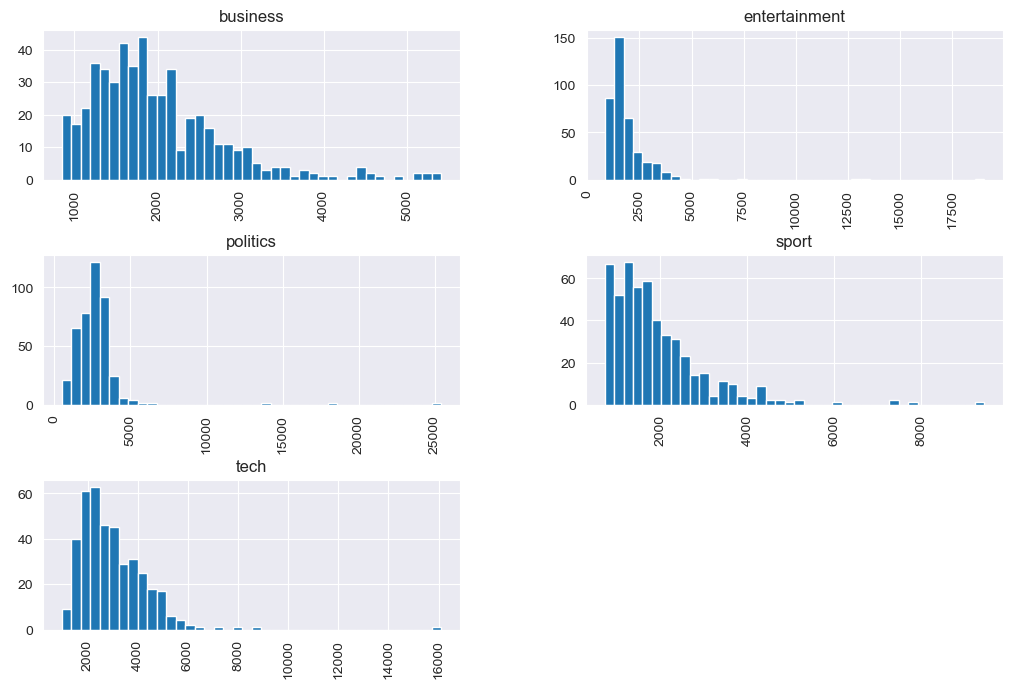

In [6]:
sns.set_style('darkgrid')
df.hist(column='length', by='labels', bins=40, figsize=(12,8))
plt.show()

## Text Preprocessing Function

In [7]:
import string
from nltk.corpus import stopwords

In [8]:
def preprocess(data):
    nopunc = [char for char in data if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

## Count Vectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
transformer = CountVectorizer(analyzer=preprocess).fit(df['data'])

In [11]:
print(len(transformer.vocabulary_))

38607


In [12]:
data_bow = transformer.transform(df['data'])

### TF-IDF
Term Frequency - Inverse Document Frequency

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
tfidf = TfidfTransformer().fit(data_bow)

### Pipeline

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [16]:
data_train, data_test, label_train, label_test = train_test_split(df['data'], df['labels'], test_size=0.2)

In [17]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=preprocess)),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])

In [18]:
pipeline.fit(data_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function preprocess at 0x0000027546BC0E00>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [19]:
preds = pipeline.predict(data_test)

### Model Performance

In [20]:
from sklearn.metrics import classification_report

In [21]:
print('Random Forest Model Performance\n')
print(classification_report(label_test, preds))

Random Forest Model Performance

               precision    recall  f1-score   support

     business       0.92      0.96      0.94        98
entertainment       0.98      0.98      0.98        87
     politics       0.95      0.97      0.96        79
        sport       0.98      0.97      0.98       108
         tech       0.99      0.92      0.95        73

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445

